In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.semi_supervised import LabelSpreading # for assigning labels to unlabeled data

In [2]:
URL="https://raw.githubusercontent.com/aviralb13/codes/main/datas/Health_insurance.csv"
data=pd.read_csv(URL)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on col1, col2 columns
data[['sex', 'smoker','region']] = data[['sex', 'smoker','region']].apply(LabelEncoder().fit_transform)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
data['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [8]:
# Randomly select 15% of observations to keep the label for. The rest of obs turned to be unlabeled
data['Rand_Selection'] = False
data.loc[data.sample(frac=0.15, random_state=42).index, 'Rand_Selection'] = True

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Rand_Selection
0,19,0,27.900,0,1,3,16884.92400,False
1,18,1,33.770,1,0,2,1725.55230,False
2,28,1,33.000,3,0,2,4449.46200,False
3,33,1,22.705,0,0,1,21984.47061,False
4,32,1,28.880,0,0,1,3866.85520,False


In [10]:
data['Rand_Selection'].value_counts()

False    1137
True      201
Name: Rand_Selection, dtype: int64

In [11]:
data['charges_target']= data.apply(lambda x: x['charges'] if x['Rand_Selection']==True else -1, axis=1)

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Rand_Selection,charges_target
0,19,0,27.900,0,1,3,16884.92400,False,-1.0
1,18,1,33.770,1,0,2,1725.55230,False,-1.0
2,28,1,33.000,3,0,2,4449.46200,False,-1.0
3,33,1,22.705,0,0,1,21984.47061,False,-1.0
4,32,1,28.880,0,0,1,3866.85520,False,-1.0


In [13]:
data['charges_target'].value_counts()

-1.00000        1137
 5272.17580        1
 23401.30575       1
 4719.73655        1
 6402.29135        1
                ... 
 23082.95533       1
 11454.02150       1
 22144.03200       1
 15230.32405       1
 4239.89265        1
Name: charges_target, Length: 202, dtype: int64

-1 = 1137 unlabeled data. 

In [14]:
#85% of the data is unlabeled. 
1137/1338

0.8497757847533632

# I tried to run the label spreading for continous data but I received an error while I was fitting the data, hence I binned the continous variable, charges, into 5 different percentiles. 

In [15]:
bin_labels_5 = ['Low', 'Low_Medium', 'Medium', 'Medium_High', 'High']
data['quantiles'] = pd.qcut(data['charges'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
data.head()

,age,sex,bmi,children,smoker,region,charges,Rand_Selection,charges_target,quantiles
0,19,0,27.900,0,1,3,16884.92400,False,-1.0,Medium_High
1,18,1,33.770,1,0,2,1725.55230,False,-1.0,Low
2,28,1,33.000,3,0,2,4449.46200,False,-1.0,Low_Medium
3,33,1,22.705,0,0,1,21984.47061,False,-1.0,High
4,32,1,28.880,0,0,1,3866.85520,False,-1.0,Low


In [16]:
#proportional distribution witin the quantiles. 
data['quantiles'].value_counts()

Low            268
Medium         268
High           268
Low_Medium     267
Medium_High    267
Name: quantiles, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on col1, col2 columns
data[['quantiles_encoded']] = data[['quantiles']].apply(LabelEncoder().fit_transform)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Rand_Selection,charges_target,quantiles,quantiles_encoded
0,19,0,27.900,0,1,3,16884.92400,False,-1.0,Medium_High,4
1,18,1,33.770,1,0,2,1725.55230,False,-1.0,Low,1
2,28,1,33.000,3,0,2,4449.46200,False,-1.0,Low_Medium,2
3,33,1,22.705,0,0,1,21984.47061,False,-1.0,High,0
4,32,1,28.880,0,0,1,3866.85520,False,-1.0,Low,1


# Label enconder gives me a disorganized enconding, so I use the below code to replace categorical data with order numbers: 

In [19]:
replace_values = {'Low' : 0, 'Low_Medium' : 1, 'Medium' : 2, 'Medium_High':3, 'High': 4}                                                                                          

data  = data.replace({"quantiles": replace_values}) 

In [20]:
data

,age,sex,bmi,children,smoker,region,charges,Rand_Selection,charges_target,quantiles,quantiles_encoded
0,19,0,27.900,0,1,3,16884.92400,False,-1.0,3,4
1,18,1,33.770,1,0,2,1725.55230,False,-1.0,0,1
2,28,1,33.000,3,0,2,4449.46200,False,-1.0,1,2
3,33,1,22.705,0,0,1,21984.47061,False,-1.0,4,0
4,32,1,28.880,0,0,1,3866.85520,False,-1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,False,-1.0,2,3
1334,18,0,31.920,0,0,0,2205.98080,False,-1.0,0,1
1335,18,0,36.850,0,0,2,1629.83350,False,-1.0,0,1
1336,21,0,25.800,0,0,3,2007.94500,False,-1.0,0,1


In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Rand_Selection', 'charges_target', 'quantiles', 'quantiles_encoded'],
      dtype='object')

In [22]:
data['quantiles_target']= data.apply(lambda x: x['quantiles'] if x['Rand_Selection']==True else -1, axis=1)

In [23]:
X=data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=data['quantiles_target'].values

In [24]:
from sklearn.preprocessing import MinMaxScaler # for feature scaling

In [25]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [26]:
model_LS = LabelSpreading(kernel='rbf', # {'knn', 'rbf'} default='rbf'
                          gamma=70, # default=20, Parameter for rbf kernel.
                          #n_neighbors=7, # default=7, Parameter for knn kernel which is a strictly positive integer.
                          alpha=0.5, # Clamping factor. A value in (0, 1) that specifies the relative amount that an instance should adopt the information from its neighbors as opposed to its initial label. alpha=0 means keeping the initial label information; alpha=1 means replacing all initial information.
                          max_iter=100, # default=30, Maximum number of iterations allowed.
                          tol=0.001, # default=1e-3, Convergence tolerance: threshold to consider the system at steady state.
                          n_jobs=-1, # default=None, The number of parallel jobs to run. -1 means using all processors.
                         )

In [27]:
model_LS_rbf = model_LS.fit(X_scaled, y)

In [28]:
data['Predicted_quantiles']= model_LS_rbf.transduction_ # Attach model predictions
df_eval=data[data['quantiles_target']==-1] # Keep only records containing masked labels, unlabeled data.

In [29]:
print("Model Name: ", str(model_LS_rbf))
print("Classes: ", model_LS_rbf.classes_)
print("Label Distributions: ", model_LS_rbf.label_distributions_)
print("Transduction Label: ", model_LS_rbf.transduction_)
print("No. of features: ", model_LS_rbf.n_features_in_)
print("No. of iterations: ", model_LS_rbf.n_iter_)
print('')

Model Name:  LabelSpreading(alpha=0.5, gamma=70, max_iter=100, n_jobs=-1)
Classes:  [0 1 2 3 4]
Label Distributions:  [[2.96070940e-27 3.71120296e-29 5.75583409e-31 1.41806214e-07
  9.99999858e-01]
 [9.97870826e-01 2.02195670e-03 5.42941542e-05 7.56706724e-07
  5.21668900e-05]
 [1.21495660e-03 9.96866192e-01 1.88214050e-03 1.64584529e-06
  3.50645565e-05]
 ...
 [9.92225278e-01 7.47447115e-03 2.96132317e-04 3.28302670e-06
  8.35046205e-07]
 [9.95092278e-01 4.78702750e-03 9.78090564e-05 2.28849913e-05
  5.18815634e-10]
 [6.20718966e-35 1.43135530e-33 5.07463226e-33 6.37156225e-07
  9.99999363e-01]]
Transduction Label:  [4 0 1 ... 0 0 4]
No. of features:  6
No. of iterations:  14



In [30]:
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # for showing confusion matrix

In [31]:
X_scaled.shape, y.shape

((1338, 6), (1338,))

In [32]:
print('*************** Evaluation of LP knn model ***************')
print(classification_report(df_eval['quantiles'], df_eval['Predicted_quantiles']))
print('')

*************** Evaluation of LP knn model ***************
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       223
           1       0.61      0.69      0.65       222
           2       0.50      0.44      0.47       235
           3       0.51      0.40      0.45       235
           4       0.64      0.73      0.69       222

    accuracy                           0.62      1137
   macro avg       0.61      0.63      0.62      1137
weighted avg       0.61      0.62      0.61      1137




In [33]:
from sklearn.model_selection import GridSearchCV

gamma float, default=20
Parameter for rbf kernel.

n_neighbors int, default=7
Parameter for knn kernel which is a strictly positive integer.

alpha float, default=0.2
Clamping factor. A value in (0, 1)

In [35]:
# Define the parameter grid for the hyperparameters to tune
param_grid = {'kernel': ['rbf', 'knn'], 'gamma': [5,10, 20, 30,40,60,70,100], 'n_neighbors': [5,7,8,15,25,30,40,50],'alpha': [0.2,0.4,0.5,0.6,0.7,0.85]}

In [36]:
# Create a LabelSpreading model
model = LabelSpreading(max_iter = 100)

In [37]:
# Create a GridSearchCV object for the model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [38]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_scaled, y)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\semi_sup

GridSearchCV(cv=5, estimator=LabelSpreading(max_iter=100),
             param_grid={'alpha': [0.2, 0.4, 0.5, 0.6, 0.7, 0.85],
                         'gamma': [5, 10, 20, 30, 40, 60, 70, 100],
                         'kernel': ['rbf', 'knn'],
                         'n_neighbors': [5, 7, 8, 15, 25, 30, 40, 50]},
             scoring='accuracy')

In [40]:
LabelSpreading_best = grid_search.best_estimator_

In [41]:
LabelSpreading_best.fit(X_scaled, y)

LabelSpreading(alpha=0.4, max_iter=100, n_neighbors=5)

In [42]:
data['Predicted_quantiles_best']= LabelSpreading_best.transduction_ 

In [43]:
data['Predicted_quantiles_best'].shape

(1338,)

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Rand_Selection,charges_target,quantiles,quantiles_encoded,quantiles_target,Predicted_quantiles,Predicted_quantiles_best
0,19,0,27.900,0,1,3,16884.92400,False,-1.0,3,4,-1,4,4
1,18,1,33.770,1,0,2,1725.55230,False,-1.0,0,1,-1,0,0
2,28,1,33.000,3,0,2,4449.46200,False,-1.0,1,2,-1,1,1
3,33,1,22.705,0,0,1,21984.47061,False,-1.0,4,0,-1,1,0
4,32,1,28.880,0,0,1,3866.85520,False,-1.0,0,1,-1,1,0


In [45]:
df_eval=data[data['quantiles_target']==-1] 

In [46]:
print('*************** Evaluation of LP knn model ***************')
print(classification_report(df_eval['quantiles'], df_eval['Predicted_quantiles_best']))
print('')

*************** Evaluation of LP knn model ***************
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       223
           1       0.65      0.81      0.72       222
           2       0.54      0.46      0.50       235
           3       0.50      0.37      0.43       235
           4       0.70      0.74      0.72       222

    accuracy                           0.65      1137
   macro avg       0.64      0.66      0.65      1137
weighted avg       0.64      0.65      0.64      1137




******************** Confusion Matrix ********************


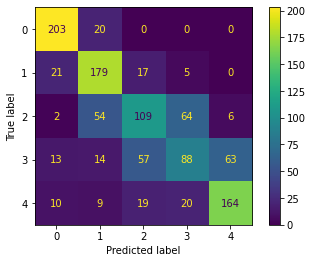

In [47]:
print('******************** Confusion Matrix ********************')
cm= confusion_matrix(df_eval['quantiles'], df_eval['Predicted_quantiles_best'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= LabelSpreading_best.classes_)
disp.plot()
plt.show()

# Using grid search for parameter optmization we improve a little bit the total f1-score from 0.62 to 0.65